# **Flower Classification Assignment**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import RMSprop


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
val_batch = 10
train_batch = 32
train_datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.30,
        )
train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(80, 80),
        batch_size=train_batch,
        class_mode='categorical',
        subset = 'training',
        color_mode = 'grayscale',
        shuffle = True,
        )
validation_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/flowers',
        target_size=(80, 80),
        batch_size=val_batch,
        class_mode='categorical',
        subset = 'validation',
        color_mode = 'grayscale',
        shuffle= True)


Found 3035 images belonging to 5 classes.
Found 1298 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [5]:
type(train_datagen)

tensorflow.python.keras.preprocessing.image.ImageDataGenerator

In [6]:
type(train_generator)

tensorflow.python.keras.preprocessing.image.DirectoryIterator

In [7]:
train_generator[31][1].shape

(32, 5)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Flatten
model = Sequential()
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5,  activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [10]:
with tf.device('/device:GPU:0'):
    result = model.fit(
          train_generator,
          steps_per_epoch = 20,
          batch_size = train_batch,
          validation_data = validation_generator,
          validation_batch_size= val_batch,
          epochs=60)

Epoch 1/60
20/20 [==============================] - 322s 17s/step - loss: 2.2604 - accuracy: 0.2349 - val_loss: 1.6083 - val_accuracy: 0.2458
Epoch 2/60
20/20 [==============================] - 84s 4s/step - loss: 1.6099 - accuracy: 0.2234 - val_loss: 1.6059 - val_accuracy: 0.2404
Epoch 3/60
20/20 [==============================] - 66s 3s/step - loss: 1.6083 - accuracy: 0.2039 - val_loss: 1.6061 - val_accuracy: 0.2304
Epoch 4/60
20/20 [==============================] - 53s 3s/step - loss: 1.6171 - accuracy: 0.2013 - val_loss: 1.6056 - val_accuracy: 0.2296
Epoch 5/60
20/20 [==============================] - 39s 2s/step - loss: 1.6057 - accuracy: 0.2226 - val_loss: 1.5967 - val_accuracy: 0.2481
Epoch 6/60
20/20 [==============================] - 34s 2s/step - loss: 1.5929 - accuracy: 0.2307 - val_loss: 1.5931 - val_accuracy: 0.2512
Epoch 7/60
20/20 [==============================] - 31s 2s/step - loss: 1.6002 - accuracy: 0.2464 - val_loss: 1.5867 - val_accuracy: 0.2450
Epoch 8/60
20/20 [

In [11]:
model.evaluate(validation_generator)

130/130 [==============================] - 5s 35ms/step - loss: 1.5213 - accuracy: 0.3012


[1.5213196277618408, 0.3012326657772064]

Accuracy was not good with 20 and 30 epocs, so I have tried using epocs upto 60, but performance remained same

In [12]:
x = result.history.keys()
x

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

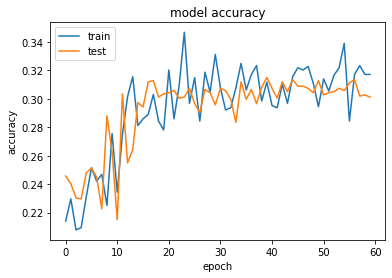

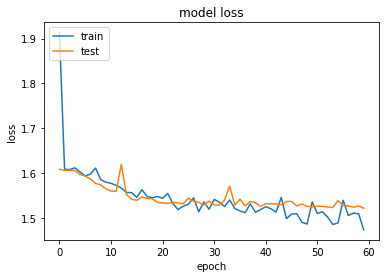

In [13]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
y_predict = model.predict(validation_generator)

In [15]:
y_predict.shape

(1298, 5)

In [16]:
val_gen_list = []
for i in range(0,len(validation_generator)):
    for j in range(0,val_batch):
        try:
              val_gen_list.append(validation_generator[i][1][j].tolist())
        except:
              break

In [17]:
np.argmax(y_predict, axis=1)[0:30]

array([4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 1, 4, 1,
       4, 1, 4, 4, 4, 1, 4, 4])

In [18]:
np.argmax(val_gen_list[0:30],axis=1)

array([2, 0, 0, 0, 2, 3, 1, 2, 2, 1, 4, 3, 4, 4, 0, 1, 2, 0, 2, 1, 0, 3,
       2, 1, 1, 2, 0, 4, 0, 4])